# Valeurs propres et rayon spectral

### Exercice 1 : Disque de Gerschgorin

*Soit A une matrice carrée*

**Question 1**: *Montrer que $Sp(A) \subset \bigcup_{i\geq 0} D(a_{ii}, r_i)$ avec $r_i =\sum_{j\neq i} \mid a_{i,j} \mid$ avec $Sp$ le spectre et $D$ un disque de rayon $r_i$ et de centre $a_{ii}$.*

**Correction**:

Soit $\lambda \in Sp(A)$ une valeur propre. On veut montrer que cette valeur propre est au moins dans un disque de Gerschgorin donc qu'il existe $i_0$ tel que:


$$
\mid \lambda - a_{i_0i_0}\mid \leq r_{i_0}
$$

Puisque $\lambda \in Sp(A)$ $\exists x \in \mathbb{R}^n\backslash\{0\}$ tel que $Ax = \lambda x$, on a donc

\begin{align*} 
\sum_{k=1}^n a_{ik}x_k = \lambda x_i, \quad \forall i \\
a_{ii}x_i + \sum_{k=1,k\neq i}^n a_{ik}x_k = \lambda x_i, \quad \forall i \\
\left( \lambda-a_{ii}\right)x_i = \sum_{k=1,k\neq i}^n a_{ik}x_k \\
\end{align*}

on prend $i_0$ tel que $\mid x_{i_0} \mid = \operatorname{max}_k \mid x_k \mid\neq 0$ et on applique la valeur absolue à la précédente équation:

$$
\displaystyle\mid\left( \lambda-a_{i_0i_0}\right)x_{i_0}\mid = \mid\sum_{k=1,k\neq i_0}^n a_{i_0k}x_k\mid
$$

$$
\displaystyle\mid\left( \lambda-a_{i_0i_0}\right)\mid = \frac{\mid\sum_{k=1,k\neq i_0}^n a_{i_0k}x_k\mid}{\mid x_{i_0}\mid}
$$

Par l'inégalité triangulaire de $\mid . \mid$ on obtient:

$$
\displaystyle\mid\left( \lambda-a_{i_0i_0}\right)\mid \leq \frac{\sum_{k=1,k\neq i_0}^n \mid a_{i_0k}x_k\mid}{\mid x_{i_0}\mid} = \frac{\sum_{k=1,k\neq i_0}^n \mid a_{i_0k} \mid \mid x_k\mid}{\mid x_{i_0}\mid}
$$

Puisque $\frac{\mid x_k\mid}{\mid x_{i_0}\mid} \leq 1$ on obtient

$$
\displaystyle\mid\left( \lambda-a_{i_0i_0}\right)\mid \leq \sum_{k=1,k\neq i_0}^n \mid a_{i_0k} \mid 
$$

ce qui montre que $\lambda \in D(a_{i_0i_0},r_{i_0})$.

**Extra :** 

Les disques de Gerschgorin sont des **outils faciles à calculer** pour des grandes matrices contrairement aux valeurs propres. Cela permet de trouver rapidement des **bornes supérieures des valeurs propres**.

Code d'un disque:

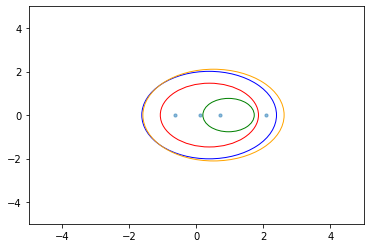

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as LA

A=np.random.rand(4,4)
r = [ np.sum(np.abs(A[i,:])) - np.abs(A[i,i]) for i in range(0,4)] 
eigenvals, evec = LA.eig(A)
xe = [ np.real(eigenvals[i]) for i in range(0,4) ]
ye = [ np.imag(eigenvals[i]) for i in range(0,4) ]

circle1 = plt.Circle((np.real(A[0,0]), np.imag(A[0,0])), r[0], fill=False, color='blue')
circle2 = plt.Circle((np.real(A[1,1]), np.imag(A[1,1])), r[1], fill=False, color='red')
circle3 = plt.Circle((np.real(A[2,2]), np.imag(A[2,2])), r[2], fill=False, color="green")
circle4 = plt.Circle((np.real(A[3,3]), np.imag(A[3,3])), r[3], fill=False, color='orange')

fig, ax = plt.subplots() 
ax.set_xlim((-5, 5))
ax.set_ylim((-5, 5))
ax.add_artist(circle1)
ax.add_artist(circle2)
ax.add_artist(circle3)
ax.add_artist(circle4)

ax.scatter(xe, ye, s=10.0, alpha=0.5)

**Question 2**: *Montrer que $B=
\begin{pmatrix}3&2&&0\\
1&\ddots&\ddots&\\
&\ddots&\ddots&2\\
0&&1&3
\end{pmatrix}$ est inversible.*

**Correction**:

On va établir une relation de récurrence entre les matrices $B_n$ pour différents $n$ afin de montrer l'inversibilité. Une matrice est inversible si le déterminant est non nul.

$$
det(B_n)= det \begin{pmatrix}3&2&&0\\
1&\ddots&\ddots&\\
&\ddots&\ddots&2\\
0&&1&3
\end{pmatrix} = 3 det B_{n-1} - 2 det \underbrace{\begin{pmatrix}
1& 2 & 0 & 0 &\ddots& 0 \\
0& 3 & 2 & 0 &\ddots& 0 \\
0 & 0 &\ddots&\ddots& \ddots& 0\\
0&\ddots & \ddots & 0& 1&3 \\
\end{pmatrix}}_{\mathrm{taille : }(n-1)\times(n-1)} = 3 det B_{n-1} - 2 det B_{n-2}
$$

on calcule que $det B_1 =3$ et $det B_2 =7$. Avec cela on obtient donc une suite sur le déterminant de $B_n$. On pose $u_n =det B_n$ et la suite est donnée par:

$$
\left\{ \begin{array}{l}
u_{n} = 3 u_{n-1} -2 u_{n-2}\\
u_1 = 3 \\
u_2 = 7 \end{array}\right.
$$

On pose le polynôme $=P(X) = X^2 -3 X +2 =0$ avec $\lambda_1,\lambda_2$ les solutions. Le terme: $u_n =\alpha \lambda_1^n + \beta \lambda_2^n$ est solution.

Cette propriété est basée sur 
- $u_n=\lambda_1^n$ injecté dans la suite donne $\lambda_1^n-3\lambda_1^{n-1}+2\lambda^{n-2}=\lambda_1^{n-2}(\lambda_1^2-3\lambda_1+2)=0$ car $\lambda_1$ est solution du polynôme.
- l'espace des suites solutions de $u_{n}=au_{n-1}+bu_{n-2}$ est un espace vectoriel de dimension 2.
- $u_n=\lambda_1^n$ et $v_n=\lambda_2^n$ forme une base de cet espace. Donc on sait que les solutions sont de la forme $u_n =\alpha \lambda_1^n + \beta \lambda_2^n$.

On résout le polynôme $P(X)=0$, on obtient $\lambda_1=2$, $\lambda_2=1$. Donc la solution est du type 

$$
u_n = \alpha 2^n + \beta 1^n
$$

avec $u_1$ et $u_2$ on déduit que $\alpha =2$ et $\beta=-1$. On a donc $Det B_n = u_n = 2^{n+1}-1>0$. La matrice est donc inversible.

**Question 3**: *Trouver $D$ diagonale telle que $DBD^{-1}$ soit symétrique. Retrouver l'inversibilité de $B$.*

On commence par écrire la matrice $C=DBD^{-1}$

$$
C_{ij}= (DBD^{-1})_{ij} =\left(\sum_{k=1}^n d_{ik}\left(\sum_{l=1}^n \frac{b_{kl}}{d_{lj}} \right)\right) = \left(\sum_{k=1}^n d_{ik} \frac{b_{kj}}{d_{jj}}\right) = \frac{d_{ii}}{d_{jj}}b_{ij}
$$

Une matrice $A$ est symétrique si $a_{ij}=a_{ji}$. Ici on obtient donc

$$
\frac{d_i}{d_j}b_{ij}=\frac{d_j}{d_i}b_{ji} \Rightarrow 2\frac{d_{i}}{d_{i+1}}=\frac{d_{i+1}}{d_i}
$$

ce qui donne $d_{i+1}=\sqrt{2}d_i$. On obtient donc, par exemple la matrice 

$$
D= det(B_n)= det \begin{pmatrix}1&0&&0\\
0&\sqrt{2}&\ddots&\\
&\ddots&\ddots&0\\
0&&0& \sqrt{2}^{n-1}
\end{pmatrix}
$$

On calcul le produit matriciel pour obtenir:

$$
C= \begin{pmatrix}3&\sqrt{2}&&0\\
\sqrt{2}&\ddots&\ddots&\\
&\ddots&\ddots&\sqrt{2}\\
0&&\sqrt{2}&3
\end{pmatrix}
$$

Pour la première et la dernière ligne, le disque de Gerschgorin est : $D(3,\sqrt{2})$.
Pour toutes les autres lignes, on voit que le disque de Gerschgorin est le même: $D(3,2\sqrt{2})$. Puisque $2\sqrt{2}<3$ et $\sqrt{2}<3$, tous les éléments du disque fermé sont non nuls. L'ensemble des valeurs propres étant incluses dans les disques on n'a pas de valeur propre nulle et donc la matrice C est inversible.

La matrice C est **semblable** à B donc B est **inversible**.

### Exercice 2 : Décomposition SVD

*Soit $A\in\mathcal{M}_{m,n}(\mathbb{R})$ de rang $r>0$.*

**Question 1** : *Que peut-on dire sur $A^tA$, notamment sur ses valeurs propres ?*

**Correction** :

On va utiliser la norme 2. Soit $\lambda$ une valeur propre de $A^t A$

$$
\parallel A x\parallel_{2}^2 =<Ax,Ax> =<x,A^{t}Ax>=<x,\lambda x>=\lambda \parallel x\parallel_2^2
$$

donc $\lambda = \frac{\parallel A x\parallel_{2}^2}{\parallel x\parallel_2^2}$. On a donc les valeurs propres de $A^t A$ réelles et positives.

**Question 2** : *Pour $\lambda$ valeur propre strictement positive de $A^TA$, on pose $\sigma=\sqrt{\lambda}$. Soit alors $\Sigma$ la matrice diagonale $\Sigma =\begin{pmatrix}
\sigma_1&&&&\\
&\sigma_2&&0&\\
&&\ddots&&\\
&0&&\sigma_{r-1}&\\
&&&&\sigma_{r}
\end{pmatrix}$. Montrer que $A=V\begin{pmatrix}\Sigma&0\\0&0\end{pmatrix} {}U^T$ avec $U$ et $V$ des matrices orthogonales.*

**Rappel** : *toute matrice normale est diagonalisable avec une matrice de passage orthogonale.*

**Correction** :

$\bullet$ Comme $A^TA$ est symétrique réelle, elle est diagonalisable dans une base de vecteurs propres orthogonaux :
 $A^TA = V D V^{T}.$ On pose $V_r\in\mathcal{M}_{n,r}(\mathbb{R})$ la matrice formée des $r$ premières colonnes de $V$, $V=\begin{pmatrix} V_{r} & * \\
\end{pmatrix}.$ 
On a alors $V_r^TV_r = I_r$ et $V_rV_r^T+**^T=I_{n}$ (car $V^TV=VV^T=I_{n}$).


$\bullet$  On note $\lambda_i$ les valeurs propres de $A^TA$, puisque le rang  de $A$ vaut $r$ on a $n-r$ valeurs propres nulles, ainsi :
$$
\begin{pmatrix} V_{r}^T \\ *^T
\end{pmatrix}A^TA \begin{pmatrix} V_{r} & * \\
\end{pmatrix} = D= \text{diag}(\lambda_1, ..., \lambda_r, 0, ..., 0)  .
 $$
 
 En notant $\Sigma$ comme dans l'énoncé, on a $V_{r}^TA^TAV_{r}=\Sigma^2$ et $A*=0.$ 
 
 $\bullet$  On souhaite maintenant se ramener à $A$. On remarque que 
 $\Sigma^{-1} V_{r}^{T} A^TA V_{r} \Sigma^{-1}= I_r,$
 donc en posant $U_r=AV_r\Sigma^{-1}  \in \mathcal{M}_{m,r}(\mathbb{R})$, on a 
 $U_{r}^T U_r = I_r,$
 mais aussi $$U_r\Sigma V_{r}^T=(AV_r\Sigma^{-1})\Sigma V_{r}^T=AV_r V_{r}^T=A(I_n-**^T)=A-A**^T=A.$$
 
 
$\bullet$ Il nous reste à construire la matrice $U$ carrée à partir de $U_r$. Comme $U_{r}^T U_r = I_r$, les colonnes de $U_r$ forment une famille orthogonale qu'on peut compléter en base orthonormale. On pose $U=\begin{pmatrix}
U_r& \star \end{pmatrix}\in\mathcal{M}_{m,m}(\mathbb{R})$ la concaténation en colonne des vecteurs de cette nouvelle base. On a ainsi $U^TU=I_m(=UU^T$ car $U$ est carrée). 

Donc 
$$U \begin{pmatrix} \Sigma & 0\\ 0 &0
\end{pmatrix}V^T=\begin{pmatrix}U_r& \star \end{pmatrix} \begin{pmatrix} \Sigma & 0\\ 0 &0
\end{pmatrix}\begin{pmatrix}V_{r}^T \\ *^T \end{pmatrix}=\begin{pmatrix}U_r\Sigma&0\end{pmatrix}\begin{pmatrix}V_{r}^T 
\\ *^T \end{pmatrix}=U_r\Sigma V_{r}^T=A.$$

Cela conclut la preuve.
 

 

### Exercice 3 : Rayon spectral

*Soient les trois matrices carrées suivantes
$$A=\begin{pmatrix}1&1\\1&1\end{pmatrix}, \ \ B=\begin{pmatrix}-1&0\\-1&-1\end{pmatrix},\ \ C=A+B$$*

**Question 1** : *Calculer le rayon spectral de chacune des matrices $A$, $B$ et $C$.*

**Correction** :

1) Matrice 1: on calcule le polynôme caractéristique:

$$
Det(A-\lambda I_2)=(1-\lambda)^2-1=-2\lambda +\lambda^2=\lambda(\lambda-2)
$$

Le spectre est donc donné par $Sp(A)=\left\{0,2\right\}$ donc $\rho(A)=2$.

2) Matrice 2: on a une matrice triangulaire de diagonal $-1,-1$. Les valeurs propres sont donc données par la diagonale donc $Sp(B)=\left\{-1,-1\right\}$ donc $\rho(B)=1$.

3) Matrice 3: 

$$
C= \begin{pmatrix}0&1\\0&0\end{pmatrix}
$$

L'argument est le même que pour la matrice 2. On obtient donc $\rho(C)=0$.

**Question 2** : *En déduire que le rayon spectral n'est pas une norme sur l'espace vectoriel des matrices $\mathcal{M}_n(\mathbb{R})$.*

**Correction** :

Une norme doit satisfait $N(x)=0$ équivaut à $x=0$. Ce n'est pas le cas ici. $\rho(C)=0$ pourtant $C$ n'est pas la matrice nulle.

**Question 3** : *Pour $A\in\mathcal{M}_n(\mathbb{R})$. Montrer que $\rho(A)\leq ||A||$ pour toute norme subordonnée $||\cdot||$.*

**Correction** :
Soit $\lambda_{max}\in Sp(A)$ tel que $|\lambda_{max}|=\rho(A)$.
On prend $x_{max}$ un vecteur propre (donc non nul) associé à la valeur propre $\lambda_{max}$. On prend la norme $\parallel .\parallel$ :

$$
\parallel Ax_{max}\parallel =\parallel \lambda_{max}x_{max}\parallel =\mid\lambda_{max}\mid \parallel x_{max}\parallel =\rho(A) \parallel x_{max}\parallel
$$

donc

$$
\rho(A) =\frac{\parallel Ax_{max}\parallel }{\parallel x_{max}\parallel} \leq sup_{x\in\mathbb{R}^n}\frac{\parallel Ax\parallel }{\parallel x\parallel}= \parallel A\parallel 
$$

**Question 4** : *Montrer que $\rho(\cdot)$ est une norme sur l'ensemble des matrices normales*

**Correction** :

Une matrice est normale si $A^{*} A = A A^{*}$. Puisque la matrice est normale elle est diagonalisable dans une base orthogonale. On a donc

$$
U A U^{*} = D, \quad U^{*} U = I_n
$$

avec $D_{i,i}=\lambda_i\in Sp(A)$. On suppose que $D_{n,n}=\lambda_{max}$. On prend la norme 2 subordonnée. On a

$$
\parallel A\parallel_2^2 = \parallel U D U^{*}\parallel_2^2 = \operatorname{sup}_{\parallel x\parallel =1}< U D U^{*}x, U D U^{*}x>= \operatorname{sup}_{\parallel x\parallel =1}< D U^{*}x, U^* U D U^{*}x> 
$$

$$
\parallel A\parallel_2^2 = \operatorname{sup}_{\parallel x\parallel =1}< D U^{*}x, U^* U D U^{*}x> =\operatorname{sup}_{\parallel x\parallel =1}< D U^{*}x, D U^{*}x> = \operatorname{sup}_{\parallel x\parallel =1}< D x, D x>
$$

$$
\operatorname{sup}_{\parallel x\parallel =1}< D x, D x>=\operatorname{sup}_{\parallel x\parallel =1}\sum_i \lambda_i^2x_i^2\leq \lambda_{max}^2\operatorname{sup}_{\parallel x\parallel =1}\sum_i^n x_i^2 = \rho(A)^2 \operatorname{sup}_{\parallel x\parallel =1}\parallel x\parallel_2^2 =\rho(A)^2
$$
Donc $\parallel A\parallel_2^2\leq\rho(A)^2$.

Pour avoir l'inégalité dans l'autre sens, on définit $x_0=\begin{pmatrix}0\\ \vdots\\ 0 \\ 1\end{pmatrix}$ on a donc $< D x_0, D x_0>=\lambda_{max}^2 =\rho(A)^2$

et donc on a (par définition du sup)

$$
\rho(A)^2\leq \operatorname{sup}_{\parallel x\parallel =1}< D x, D x>.
$$

On conclut car $\parallel A\parallel_2 =\operatorname{sup}_{\parallel x\parallel =1}< Dx, D x>$.  Le rayon spectral est donc égale à la norme 2 pour les matrices normales et forme donc une norme.

### Exercice 4 : Rayon spectral et séries matricielles 

*Soit $A\in\mathcal{M}_n(\mathbb{R})$.*

**Question 1** : *Montrer que si $\rho(A)<1$, les matrices $I_n-A$ et $I_n+A$ sont inversibles (avec $I_n$ la matrice identité).*

**Correction :**

On raisonne par contraposé. On suppose que la matrice n'est pas inversible. Il existe donc $x$ non nul tel que

$$
(I_n \pm A)x =0, \Rightarrow Ax = \pm x
$$

donc on a que $\pm 1\in Sp(A)$ donc $\rho(A)\geq 1$. La matrice est donc inversible pour $\rho(A)<1$.

**Question 2** : *Montrer que la série de terme général $A^k$ converge vers $(I_n-A)^{-1}$ si et seulement si $\rho(A)<1$.*

**Correction** :

- On remarque que

$$
\left(\sum_{k=0}^n A^k\right)(I_n-A)= \sum_{k=0}^n A^k- \sum_{k=1}^{n+1} A^k = I-A^{n+1}
$$ 

- On rappelle que $\forall \epsilon, \forall A, \exists \parallel.\parallel_{A,\epsilon}$ une norme subordonnée tel que $\parallel A\parallel_{A,\epsilon} \leq \rho(A)+\epsilon$

 1) Maintenant on souhaite commencer par démontrer que $\rho(A)<1 \Longleftrightarrow \lim_{k \to +\infty} A^k= 0$.

On part de $\rho(A)<1$ donc il existe $\epsilon$ tel que $\rho(A)\leq 1-2\epsilon$. Le rappel donne que

$$
\parallel A\parallel_{A,\epsilon}\leq 1-\epsilon
$$

La norme étant subordonnée, elle est matricielle. Par consequent

$$
\parallel A^k \parallel_{A,\epsilon} \leq  \parallel A \parallel_{A,\epsilon}^k\leq(1-\epsilon)^k
$$

Or $\lim_{k \to +\infty} (1-\epsilon)^k =0$.

On est dans un espace de dimension finie. Il existe donc une équivalence entre toutes les normes et donc 

$$
\lim_{k \to +\infty} \parallel A^k \parallel =0
$$

ce qui permet d'obtenir l'implication dans un sens de l'objectif (1). On souhaite maintenant montrer l'implication dans le sens inverse.

Soit $\lambda$ une valeur propre de $A$ et $x$ un vecteur propre associé. On a donc $A x=\lambda x$. On multiplie cette égalité par $A$:

$$
A (A x)= A(\lambda x) \Longleftrightarrow A^2 x = \lambda A x = \lambda^2 x
$$

En multipliant de façon itérative par $A$ on obtient que 

$$
A^k x = \lambda^k x, \quad \forall k  
$$

On a supposé que $\lim_{k \to +\infty} A^k= 0$ donc $\lim_{k \to +\infty} \lambda^k x= 0$. Ceci est possible que si $\lambda <1$. Le raisonnement étant vrai pour l'ensemble des valeurs propres, elle est vraie aussi pour $\lambda_{max}$ tel que $|\lambda_{max}|=\rho(A)$. La seconde implicitation est donc prouvée ainsi que (1).

On passe au résultat final. Par hypothèse $\rho(A)<1$ donc $\lim_{k \to +\infty} A^k= 0$. On en conclut que sous cette **condition spectrale** on obtient la **convergence** de la série


$$
\left( \sum_{k=0}^{\infty} A^k\right)
$$

Dans la question 1, on a démontré que $I_n-A$ est **inversible**. On reprend maintenant

$$
\left(\sum_{k=0}^n A^k\right)(I-A) = I-A^{n+1}
$$ 

en prenant la limite de cette égalité on obtient

$$
\left(\sum_{k=0}^{\infty} A^k\right)(I-A)= I- \lim_{k \to +\infty} A^{k} = I
$$ 

ce qui implique que $\left(\sum_{k=0}^{\infty} A^k\right)=(I-A)^{-1}$. Maintenant on souhaite montrer l'implication dans le sens inverse. 

On suppose que la série converge. On suppose également par l'absurde que $\rho(A)\geq 1$ on a donc par (1) on a $\lim_{k \to +\infty} A^k \neq 0$ et donc la série ne converge pas. Par l'absurde on a donc $\rho(A)< 1$ et donc l'équivalence finale.

**Extra** : On remarque la série approchant $(I-A)^{-1}$ est la même que le développement limité approchant $\frac{1}{1-x}$. Cette formule est donc l'équivalent matriciel d'un **développement limité**. 

### Exercice 5 : Rayon spectral et limites matricielles

**Question 1** : *Soit $A$ une matrice carrée, montrer que les assertions suivantes sont équivalentes:*
- $\underset{k\rightarrow+\infty}{\text{lim}}A^k=0$ (1)
- $\underset{k\rightarrow+\infty}{\text{lim}}A^kx=0$, *pour tout* $x\in\mathbb{R}^n$ (2)
- $\rho(A)<1$ (3)
- $||A||<1$ *pour au moins une norme matricielle subordonnée.* (4)

**Correction** :

- On commence par montrer $(1) \Rightarrow (2)$.

Soit $x\in \mathbb{R}^n$ et $\parallel . \parallel$ une norme subordonnée. On a donc

$$
\parallel A^k x \parallel \leq \parallel A^k \parallel \parallel x \parallel
$$

(1) veut dire que pour toute norme $N$, $\underset{k\rightarrow+\infty}{\text{lim}}N(A^k)=0$ donc $\underset{k\rightarrow+\infty}{\text{lim}}\parallel A^k \parallel =0$ ce qui nous permet de conclure

$$
\underset{k\rightarrow+\infty}{\text{lim}}\parallel A^k x\parallel =0
$$

ce qui revient a (2).

- On montre $(2) \Rightarrow (3)$.

Soit $\lambda \in Sp(A)$ et $x\neq 0$ le vecteur propre associé. On a $A^k x = \lambda^k x$ donc (2) implique que 

$$
\underset{k\rightarrow+\infty}{\text{lim}}\lambda^k x =0
$$

ceci n'est possible que si $\mid \lambda \mid<1$ quelque soit la valeur propre $\lambda$. On en conclut donc  $\rho(A)<1$.

- On montre $(3) \Rightarrow (4)$.

On rappelle que $\forall \epsilon$ il existe $\parallel . \parallel_{A,\epsilon}\leq \rho(A) +\epsilon$. On supppose $\rho(A)\leq 1$ et on choisit

$$
\epsilon = \frac{1-\rho(A)}{2}
$$

donc pour ce $\epsilon$ on a $\parallel . \parallel_{A,\epsilon}\leq \rho(A) +\epsilon = \frac12 < 1$. Donc au moins pour cette norme subordonnée on a $\parallel . \parallel_{A,\epsilon}< 1$

- On montre $(4) \Rightarrow (1)$.

On définit $\epsilon$ tel que $\parallel A \parallel \leq 1 -\epsilon$. Puisqu'il s'agit d'une norme matricielle on a:

$$
\parallel A^k\parallel \leq \parallel A\parallel^k \leq (1-\epsilon)^k
$$

on obtient donc naturellement que:

$$
\underset{k\rightarrow+\infty}{\text{lim}}\parallel A^k \parallel =0
$$

### Exercice 6 : Le conditionnement n’est pas le déterminant

*Soit $A=(a_{i,j})_{i,j}$ la matrice diagonale telle que $a_{1,1}=1$ et $ a_{i,i}=0.1$ pour $i=2,...,100$*.

**Question 1** : *Calculer $||A||_{2}$, $||A^{-1}||_{2}$, $cond_2(A)$ et $det(A)$*

**Correction :**

$$
||A||_{2}=\sqrt{\rho(A A^t)}= \rho(A) =1
$$

car diagonale.

$$
||A^{-1}||_{2}= \rho(A^{-1}) = 10
$$

Par conséquent le conditionnement est donné par $cond_2(A)=||A||_{2}||A^{-1}||_{2}=10$.

Pour une matrice diagonale le determinant est donné par le produit des termes donc on a

$$
det(A) =0.1^{99} \ll1
$$

On voit donc que le conditionnnement et le determinant ne sont pas liés. L'un se comporte comme le ratio entre la plus grande et la plus petite valeurs propres et l'autre comme le produit de l'ensemble des valeurs propres.

### Exercice 7 : Conditionnement et valeurs propres 

*Soit $A$ une matrice carrée quelconque, supposée inversible.*

**Question 1 :** *Montrer que $cond_2(A)=\frac{\sigma_{\text{max}}(A)}{\sigma_{\text{min}}(A)}$ où $\sigma_{\text{max}}(A)$ et $\sigma_{\text{min}}(A)$ désignent respectivement la plus grande et la plus petite valeur singulière de $A$ en module ($\sigma_i(A)=\sqrt{\lambda_i}$ avec $\lambda_i$ les valeurs propres de $ A^T A$).*

**Correction :**

La matrice $A^t A$ est normale donc il existe une matrice unitaire $U$ tel que:

$$
A^t A = U D U^t, \quad (A^t A)^{-1}= U^t D^{-1} U
$$

$D$ est la matrice diagonale avec les valeurs propres de $A^tA$ donc $D_{ii}=\sigma_i^2$.
Et on a $D^{-1} = diag\left(\frac{1}{\sigma^2_i}\right)$. On obtient donc que les valeurs propres de $(A^t A)^{-1}$ sont données par les inverses des valeurs propres de $A^t A$. On a donc $\rho((A^tA)^{-1})=\frac{1}{\sigma^2_{min}}.$

Maintenant on estime le conditionnement:

$$
\parallel A \parallel_2 = \sqrt{\rho(A^t A)} =\sqrt{\sigma^2_{max}}
$$

$$
\parallel A^{-1} \parallel_2 = \sqrt{\rho(A^{-1}( A^{-1})^t)} =\sqrt{\rho((A^t A)^{-1})}=\sqrt{ \frac{1}{\sigma^2_{min}}}
$$

On a donc

$$
cond_2 (A) = \parallel A \parallel_2\parallel A^{-1} \parallel_2 =\sqrt{\frac{\sigma^2_{max}}{\sigma^2_{min}}}
$$

**Question  2:**  *Montrer que si $A$ est une matrice symétrique réelle,  $cond_2(A)=\frac{|\lambda_{\text{max}}|}{|\lambda_{\text{min}}|}$ où $\lambda_{\text{max}}$ et $\lambda_{\text{min}}$ désignent respectivement la plus grande et la plus petite valeur propre de $A$, classées en valeurs absolues.*

**Correction :**

On suppose que la matrice est normale donc il existe U tel que

$$
A = U D  U^t, \mbox{ avec } U^t U =I_n
$$

On utilise le resultat du cours qui dit que $\parallel A\parallel_2^2=\parallel U D  U^t\parallel_2^2 =\parallel D\parallel_2^2 =\operatorname{sup}_{\parallel x\parallel =1}\parallel Dx\parallel_2^2$.

On remarque que

$$
\parallel Dx\parallel_2^2 =\sum_i \lambda_i^2 x_i^2 \leq \lambda_{max}^2 \sum_i x_i^2 = \rho(D)^2 \parallel x \parallel_2^2
$$

Il existe un vecteur pour lequel il y a egalité $\parallel Dx\parallel_2^2= \rho(D)^2 \parallel x \parallel_2^2$ le vecteur propre associée à la valeur propre maximale. Donc

$$
\operatorname{sup}_{\parallel x\parallel =1}\parallel Dx\parallel_2^2 =\rho(D)^2 =\rho(A)^2
$$

On a donc $\parallel A\parallel_2^2 =\rho(A)^2$. 

On en conclut que $\parallel A \parallel_2=\rho(A) =\mid \lambda_{max} \mid$ et $\parallel A^{-1} \parallel_2 = \rho(A^{-1}) = \frac{1}{\mid \lambda_{min} \mid}$ en utilisant les mêmes arguments que la question précédente. Cela permet de conclure. 

### Exercice 8 : Conditionnement du Laplacien  (A faire)

*Soit $A\in\mathcal{M}_{N}(\mathbb{R})$ la matrice du Laplacien : $A=\frac{1}{h^2} \begin{pmatrix}
2&-1&&&0\\
-1&2&-1&&\\
&\ddots&\ddots&\ddots&\\
&&-1&2&-1\\
0&&&-1&2
\end{pmatrix}$*.

**Question 1 :** *Vérifiez que les éléments propres $(\lambda^{(k)}, v^{(k)})$ sont donnés par*

$$
v_i^{(k)}=\sin\left(\frac{k\pi i}{N+1}\right),\ \text{pour}\ i=1, ..., N\ \ \ \text{et}\ \ \ \lambda^{(k)}=\frac{4}{h^2}\sin^2\left(\frac{k\pi}{2(N+1)}\right).
$$

**Correction :**

**Question 2 :**  *Calculer $||A||_1$, $||A||_{\infty}$ ainsi que le conditionnement en norme 2 de $A$*

**Correction :**

### Exercice 9 : Préconditionnement 

*Soient $A=\begin{pmatrix}1&0\\0&10^{-6}\end{pmatrix}$ et $\Delta A=\begin{pmatrix}10^{-8}&0\\0&10^{-14}\end{pmatrix}$* 

**Question 1 :** *Calculer $cond_2(A)$. Que vaut $\frac{||\Delta A||_2}{||A||_2}$ ?*

**Correction :**

On a vu que pour une matrice normale (ce qui est le cas d'une matrice diagonale)

$$
cond_2(A) = \frac{|\lambda_{\text{max}}|}{|\lambda_{\text{min}}|} =\frac{1}{10^{-6}} =10^{6}
$$

et 

$$
\frac{||\Delta A||_2}{||A||_2} =  \frac{|\lambda_{\text{max}}|}{|\lambda_{\text{min}}|} =\frac{10^{-8}}{1}=10^{-8}
$$

car les matrices sont diagonales.

**Question 2 :** *Soit $Ax=(A+\Delta A)(x+\Delta x)$. Que vaut $\frac{||\Delta x||_2}{||x||_2}$? Le comparer avec $cond_2(A)\frac{||\Delta A||_2}{||A||_2(1-||A^{-1}\Delta A||_2)}$.*

**Correction :**

- Etape 1:

$$
Ax = Ax+ A\Delta x + \Delta A(x+\Delta x), \Rightarrow (A+\Delta A) \Delta x= -\Delta A x
$$

donc 

$$
    \Delta x = - (A+\Delta A)^{-1} \Delta A x\quad  \Rightarrow \parallel \Delta x \parallel_2 = \parallel  (A+\Delta A)^{-1} \Delta A x \parallel_2 
$$

On calcule la matrice $(A+\Delta A)^{-1} \Delta A$:

$$
(A+\Delta A)^{-1} \Delta A =\begin{pmatrix}\frac{10^{-8}}{1+10^{-8}} &0\\0&\frac{10^{-14}}{10^{-6}+10^{-14}}\end{pmatrix} = \frac{10^{-8}}{1+10^{-8}} I_n
$$

donc $\parallel \Delta x \parallel_2= \parallel \frac{10^{-8}}{1+10^{-8}} I_n x\parallel_2 = \frac{10^{-8}}{1+10^{-8}}\parallel x\parallel_2$ donc

$$
\frac{||\Delta x||_2}{||x||_2}=  \frac{10^{-8}}{1+10^{-8}}
$$

- Etape 2: On souhaite montrer que si $\parallel A^{-1} \Delta A\parallel_2 < 1$ alors $\frac{||x +\Delta x||_2}{||x||_2} \leq \frac{1}{1 - \parallel A^{-1} \Delta A\parallel_2}$.

On note, $Ax=b$, on a 

$$
\frac{||x + \Delta x||_2}{||x||_2} = \frac{||(A+\Delta A)^{-1} b||_2}{||A^{-1} b||_2} =\frac{||(A(I_d+A^{-1}\Delta A))^{-1} b||_2}{||A^{-1} b||_2}=\frac{||(I_d+A^{-1}\Delta A)^{-1} A^{-1} b||_2}{||A^{-1} b||_2}
$$

or $\parallel A^{-1} \Delta A\parallel_2 < 1$ en utilisant les résultats de l'exercice 7:

$$
\sum_{k\geq 0}(A^{-1} \Delta A)^k = (I_d -A^{-1}\Delta A)^{-1}
$$

donc

$$
\frac{||x + \Delta x||_2}{||x||_2} =\frac{||\left( \sum_{k\geq 0}(-A^{-1} \Delta A)^k\right) A^{-1} b||_2}{||A^{-1} b||_2}  \leq \sum_{k\geq 0} \parallel (A^{-1} \Delta A) \parallel_2^k \frac{||A^{-1} b||_2}{||A^{-1} b||_2}
$$

$$
\frac{||x + \Delta x||_2}{||x||_2} \leq \sum_{k\geq 0} \parallel (A^{-1} \Delta A) \parallel_2^k = \frac{1}{1-\parallel A^{-1}\Delta A\parallel_2}
$$

on utilise pour la dernière égalité le développement en série de la fonction $\frac{1}{1-x}$. Le résultat est donc

$$
\frac{||x + \Delta x||_2}{||x||_2} \leq \frac{1}{1-\parallel A^{-1}\Delta A\parallel_2}
$$

- Etape 3: majorer $\frac{||\Delta x||_2}{||x + \Delta x||_2}$:

$$
Ax = (A+\Delta A)(x+\Delta x) = Ax + A\Delta x + \Delta A x + \Delta A \Delta x
$$

donc $A \Delta x= -\Delta A (x+\Delta x)$ et 

$$
\Delta x = - A^{-1}\Delta A (x+\Delta x)
$$

en passant à la norme:

$$
\parallel \Delta x \parallel_2= \parallel A^{-1}\Delta A (x+\Delta x)\parallel_2 \leq \parallel A^{-1} \parallel_2 \parallel \Delta A \parallel_2 \parallel (x+\Delta x)\parallel_2
$$

donc

$$
\frac{\parallel \Delta x \parallel_2}{ \parallel (x+\Delta x)\parallel_2} \leq \parallel A^{-1} \parallel_2 \parallel \Delta A \parallel_2 = \parallel A^{-1} \parallel_2 \parallel A \parallel_2 \frac{\parallel \Delta A \parallel_2}{ \parallel A \parallel_2} =cond_2(A) \frac{\parallel \Delta A \parallel_2}{\parallel A \parallel_2}
$$

- Etape 4: 

$$
\frac{\parallel \Delta x\parallel_2}{\parallel x\parallel_2} = \frac{||x + \Delta x||_2}{||x||_2}  \frac{\parallel \Delta x \parallel_2}{ \parallel (x+\Delta x)\parallel_2}
$$

en utilisant l'étape 3 et l'étape 2 on obtient donc

$$
\frac{\parallel \Delta x\parallel_2}{\parallel x\parallel_2} \leq cond_2(A) \frac{\parallel \Delta A \parallel_2}{\parallel A \parallel_2\left(1-\parallel A^{-1}\Delta A\parallel_2\right)}
$$

- Etape 5: on estime la partie droite de l'inégalité

on obtient $cond_2(A) \frac{\parallel \Delta A \parallel_2}{\parallel A \parallel_2\left(1-\parallel A^{-1}\Delta A\parallel_2\right)} = 10^6 \left( \frac{10^{-8}}{1-10^{-8}}\right) \sim 10^{-2}$.

**Remarque**: On voit que le calcul direct de $\frac{\parallel \Delta x\parallel_2}{\parallel x\parallel_2}$ donne $10^{-8}$ alors que l'estimation donnée par les termes matricielles est très éloignée (ici $10^{-2}$). On voit que le conditionnement explique la différence entre les deux estimations. 

**Question 3**: *Soit $D=\begin{pmatrix}1&0\\0&10^6\end{pmatrix}$. 
Exprimer $DA$ et $D\Delta A$. Que vaut $cond_2(DA)$ ? Comparer $\frac{||\Delta x||_2}{||x||_2}$ avec $cond_2(DA)\frac{||D\Delta A||_2}{||DA||_2(1-||(DA)^{-1}D\Delta A||_2)}$.*

**Remarque** : *La matrice $D$ a permis de mieux conditionner la matrice $A$.*

**Correction :**

$$
DA=\begin{pmatrix}1&0\\0&1\end{pmatrix}, \quad D\Delta A=\begin{pmatrix}10^{-8}&0\\0& 10^{-8}\end{pmatrix}
$$

On applique les même calculs à $DA$ et on a $cond_2(DA)=1$ et 

$$
cond_2(DA)\frac{||D\Delta A||_2}{||DA||_2(1-||(DA)^{-1}D\Delta A||_2)} = \frac{10^{-8}}{1-10^{-8}}
$$

Ici l'estimation est bien meilleure en utilisant la multiplication par $D$.

### Exercice 10 (implémentation Python) : Matrice mal conditionnée

*Soit $A$ la matrice $$A=\begin{pmatrix}
10&7&8&7\\
7&5&6&5\\
8&6&10&9\\
7&5&9&10
\end{pmatrix}$$*

**Question 1**: *A l’aide de la fonction np.linalg.inv de python, affichez l’inverse de A.*

In [9]:
import numpy as np

A=np.array([[10., 7., 8., 7.],[7, 5, 6, 5], [8, 6, 10, 9], [7, 5, 9, 10]])
print(">> A>> ",A)
B=np.linalg.inv(A)
print(">> B>> ",B)

>> A>>  [[10.  7.  8.  7.]
 [ 7.  5.  6.  5.]
 [ 8.  6. 10.  9.]
 [ 7.  5.  9. 10.]]
>> B>>  [[ 25. -41.  10.  -6.]
 [-41.  68. -17.  10.]
 [ 10. -17.   5.  -3.]
 [ -6.  10.  -3.   2.]]


**Question 2**:  *Résoudre $Ax=b$ avec $b=\begin{pmatrix}32\\23\\33\\31\end{pmatrix}$. On pourra utiliser la fonction "np.linalg.solve".*

In [6]:
b=np.array([32., 23., 33., 31])
x=np.linalg.solve(A,b)
print(">> x >>",x)

>> x >> [ 105.70674683  -37.83106725   88.63315788 -135.99783126]


**Question 3**: *Résoudre $A\tilde{x}=\tilde{b}$ avec $\tilde{b}=b+\varepsilon$ où $\varepsilon$ est un vecteur "tout petit".*

In [7]:
btilde=np.array([32.+1.e-8, 23., 33.-1.e-13, 31])
xtilde=np.linalg.solve(A,btilde)
print(">> xtilde >>",xtilde)

>> xtilde >> [ 105.70674678  -37.83106727   88.63315784 -135.99783115]


**Question 4**: *Afficher les erreurs relatives $\frac{||\tilde{b}-b||}{||b||}$ et $\frac{||\tilde{x}-x||}{||x||}$ et vérifier numériquement que $\frac{||\tilde{x}-x||}{||x||}\leq Cond(A)\frac{||\tilde{b}-b||}{||b||}$. On pourra utiliser la fonction "np.linalg.eigvals" pour calculer les valeurs propres.*

In [12]:
erreurb=np.linalg.norm(btilde-b)/np.linalg.norm(b)
erreurx=np.linalg.norm(xtilde-x)/np.linalg.norm(x)
print("erreur RHS>> ",erreurb,"erreur Sol>> ",erreurx)

rhoA=np.max(np.abs(np.linalg.eigvals(np.dot(A.T,A))))
rhoAinv=np.max(np.abs(np.linalg.eigvals(np.dot(B.T,B))))

print("conditionnement >>",rhoA*rhoAinv)
print("comparaison erreur >>> ",erreurx-rhoA*rhoAinv*erreurb)

erreur RHS>>  1.665972793874435e-10 erreur Sol>>  6.404594848916147e-10
conditionnement >> 8904809.25219339
comparaison erreur >>>  -0.001483516354420069


**Extra 1**: on remarque qu'une erreur de $10^{-10}$ génère une erreur de $10^{-7}$. Cela est du au gros conditionnement.

### Extra 2: conditionnement

$$
C=\begin{pmatrix}
1 & \frac{1}{\epsilon} & \frac{1}{\epsilon}\\
1 & \epsilon & 0 \\
1 & 0 & \epsilon \\
\end{pmatrix}
$$

On va resoudre $x= A^{-1}(b_{ref}+\lambda)$ avec $\lambda$ une perturbation très petite.
Puis on va calculer $Ax$. Normalement on devrait retrouver quelque chose proche de $b_{ref}$. 

>>> propagation d'erreur pour le plus petit conditionnement: 1.8451838757030568e-09
>>> propagation d'erreur pour le plus grand conditionnement: 0.24459622566055642


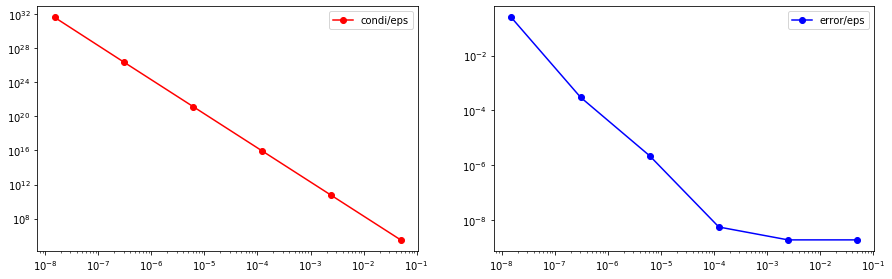

In [9]:
import matplotlib.pyplot as plt
from numpy import linalg as LA
from matplotlib import gridspec

eps =[]
condi = []
error = []
bref = [1.22, 9.2145,1.31]
b= [1.22+1e-8, 9.2145-1e-8,1.31+1e-8]
for i in range (1,7): 
    eps.append(1.0/((np.exp(3.0*i))))
    C=np.array([[1.0,1.0/eps[-1],1.0/eps[-1]],[1.0, eps[-1], 0.0], [1.0, 0.0, eps[-1]]])
    D=np.linalg.inv(C)
    
    rhoA=np.abs(np.linalg.eigvals(np.dot(C.T,C)))
    rhoAinv=np.abs(np.linalg.eigvals(np.dot(D.T,D)))

    condi.append(np.max(rhoA)*np.max(rhoAinv))
    x = np.dot(D,b)
    bnew = np.dot(C,x)
    error.append(np.linalg.norm(bnew-bref)/np.linalg.norm(bref))

plt.figure(figsize=(15,4.5))
gs = gridspec.GridSpec(1, 2, width_ratios=[1.8, 1.8])
ax1 = plt.subplot(gs[0])  
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.plot(eps, condi,'-ro', label='condi/eps')
ax1.legend()
    
ax2 =plt.subplot(gs[1])
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.plot(eps, error,'-bo', label="error/eps") 
ax2.legend()

print(">>> propagation d'erreur pour le plus petit conditionnement:",error[0])
print(">>> propagation d'erreur pour le plus grand conditionnement:",error[-1])

L'ordinateur est précis jusqu'à une certaine limite ($1e^{-16}$ en double précision). Les erreurs d'arrondis se propage. Le **conditionnemement mesure l'importance de propagation de l'erreur**. Ici a partir de $\epsilon=1e^{-4}$ l'erreur devient plus grande que la perturbation initiale.

### Exercice 11: Calcul pratique du conditionnement

Question : Soit $A=\begin{pmatrix}2&1\\0&1\end{pmatrix}$. Calculer le conditionnement pour la norme 2 de $A$.

**Correction**:

On a $A^tA=\left(\begin{array}{cc}2&0\\1&1\end{array}\right)\left(\begin{array}{cc}2&1\\0&1\end{array}\right)=\left(\begin{array}{cc}4&2\\2&2\end{array}\right)$.

Le polynôme caractéristique associé à $A^tA$ vaut : $(4-\lambda)(2-\lambda)-4=\lambda^2-6\lambda+4$,

dont le discriminant est $\Delta=36-4\times4=20$ et les racines sont : $\lambda_1=3+\sqrt{5}$ et $\lambda_1=3-\sqrt{5}$.

On en déduit que $\parallel A\parallel_2=\sqrt{\rho(A^tA)}=\sqrt{3+\sqrt{5}}$.

On a $A^{-1}=\frac12\left(\begin{array}{cc}1&-1\\0&2\end{array}\right)$, d'où 
$(A^{-1})^tA^{-1}=\frac12\left(\begin{array}{cc}1&0\\-1&2\end{array}\right)\frac12\left(\begin{array}{cc}1&-1\\0&2\end{array}\right)
=\frac14\left(\begin{array}{cc}1&-1\\-1&5\end{array}\right)$.

Le polynôme caractéristique associé à $(A^{-1})^tA^{-1}$ vaut : $(\frac14-\lambda)(\frac54-\lambda)-\frac{1}{16}=\lambda^2-\frac{6}{4}\lambda+\frac{1}{4}$,

dont le discriminant est $\Delta=\frac{36}{16}-\frac{4\times 4}{16}=\frac{20}{16}$ et les racines sont : $\lambda_1=\frac{3+\sqrt{5}}{4}$ et $\lambda_1=\frac{3-\sqrt{5}}{4}$.

On en déduit que $\parallel A^{-1}\parallel_2=\sqrt{\rho((A^{-1})^tA^{-1})}=\sqrt{\frac{3+\sqrt{5}}{4}}$.

Donc $\mbox{cond}_2(A)=\sqrt{3+\sqrt{5}}\sqrt{\frac{3+\sqrt{5}}{4}}=\frac{3+\sqrt{5}}{2}$.


### Exercice 12: Conditionnement des normes $||\cdot||_1$ et $||\cdot||_{\infty}$

1)  Soit $B\in \mathcal{M}_n(\mathbb{R})$, la matrice suivante :
$B=\begin{pmatrix}
1&-1&\dots&-1\\
0&1&\ddots&\vdots\\
\vdots&\ddots&\ddots&-1\\
0&\dots&0&1\\
\end{pmatrix} .$

   (a) Calculer $B^{-1}$.

   (b) En déduire cond$_1(B)$ et cond$_{\infty}(B)$.

2) On considère $A\in\mathcal{M}_n(\mathbb{R})$.

   (a) Montrer que pour tout $x\in\mathbb{R}^n$, on a $||x||_{\infty}\leq ||x||_1\leq n||x||_{\infty}.$

   (b) En déduire que $\frac{1}{n}||A||_{\infty}\leq ||A||_1\leq n||A||_{\infty}.$

   (c) Conclure que $\frac{1}{n^2}\text{cond}_{\infty}(A)\leq\text{cond}_1(A)\leq n^2\text{cond}_{\infty}(A).$

**Correction**:
    
**Question 1) (a)**:
Montrons que $(B^{-1})_{ij}=\left\{\begin{array}{ll}1&\mbox{ si }i=j\\2^{j-i-1}&\mbox{ si }j>i\\0&\mbox{ si }i>j\end{array}\right.$


On a 

$\begin{array}{rcl}
(BB^{-1})_{ij}&=&\sum\limits_{k=1}^n(B)_{ik}(B^{-1})_{kj}\\
&=&(B^{-1})_{ij}-\sum\limits_{k=i+1}^n(B^{-1})_{kj}
\end{array}$

- Si $i=j$:

$(BB^{-1})_{ii}=1$

- Si $i>j$:

$(BB^{-1})_{ij}=0$

- Si $i<j$:

$\begin{array}{rcl}
(BB^{-1})_{ij}&=&2^{j-i-1}-\sum\limits_{k=i+1}^{j-1}2^{j-k-1}-1\\
&=&2^{j-i-1}-2^{j-1}\sum\limits_{k=i+1}^{j-1}2^{-k}-1\\
&=&2^{j-i-1}-2^{j-1}\frac{(\frac12)^{i+1}-(\frac12)^{j}}{1-\frac12}-1\\
&=&2^{j-i-1}-2^{j-1}(2^{-i}-2^{-j+1})-1=0
\end{array}$


**Question (b)**: $||B||_1=\max_j \sum_i|b_{ij}|=n$ 
   
   et $||B^{-1}||_1=\max_j \sum_i|(B^{-1})_{ij}|=\sum\limits_{i=1}^{n-1}2^{n-i-1}+1
   =2^{n-1}\sum\limits_{i=1}^{n-1}2^{-i}+1=2^{n-1}\frac{\frac12-(\frac12)^{n}}{1-\frac12}+1=2^{n-1}$

D'où $\mbox{cond}_1(B)=n2^{n-1}$.




Idem, on a $||B||_\infty=\max_i \sum_j|b_{ij}|=n$ 
   et $||B^{-1}||_\infty=\max_i \sum_j|(B^{-1})_{ij}|=2^{n-1}$ 
   
Et donc $\mbox{cond}_\infty(B)=n2^{n-1}$.


**Question 2) (a)**: Soit $x\in\mathbb{R}^n$.

On a $$||x||_{\infty}=\max_i|x_i|\leqslant \sum_i|x_i|= ||x||_1$$

et

 $$||x||_1=\sum_i|x_i|\leq \sum_i\max_j|x_j|\leq n\max_j|x_j|=n||x||_{\infty}.$$


**Question 2) (b)**: 

Comme $||A||_{\infty}=\sup_x\frac{||Ax||_{\infty}}{||x||_{\infty}}$, on a pour tout $x\in\mathbb{R}^n\backslash\{0\}$,
$$||Ax||_{\infty}\leqslant ||A||_{\infty}||x||_{\infty}$$
D'après la question précédente
$$||Ax||_{1}\leq n||Ax||_{\infty}\leqslant n||A||_{\infty}||x||_{\infty}\leq n||A||_{\infty}||x||_{1}$$
d'où en passant au sup on obtient
$$||A||_{1}\leqslant n||A||_{\infty}$$
De la même manière
$$||Ax||_{\infty}\leq ||Ax||_{1}\leq ||A||_{1}||x||_1\leqslant n||A||_{1}||x||_{\infty}$$
d'où en passant au sup on obtient
$$||A||_{\infty}\leqslant n||A||_{1}$$




**Question 2) (c)**: On en déduit 
$\text{cond}_{\infty}(A)=||A||_{\infty}||A^{-1}||_{\infty}
\leqslant n^2||A||_{1}||A^{-1}||_{1}=n^2\text{cond}_1(A)$


et $\text{cond}_1(A)=||A||_{1}||A^{-1}||_{1}\leqslant n^2||A||_{\infty}||A^{-1}||_{\infty}=n^2\text{cond}_{\infty}(A).$
